In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import regionmask
import pandas as pd
import xesmf as xe

In [2]:
ds_HEMCO = xr.open_dataset('../../GCrundirs/test_NEI_jan_daily_improvedlev/geosfp_4x5_standard/OutputDir/HEMCO_diagnostics.201601010000.nc')

In [3]:
ds_HEMCO

<xarray.Dataset>
Dimensions:                         (lat: 46, lev: 72, lon: 72, time: 1)
Coordinates:
  * lon                             (lon) float64 -180.0 -175.0 ... 170.0 175.0
  * lat                             (lat) float64 -89.0 -86.0 ... 86.0 89.0
  * lev                             (lev) float64 0.9925 0.9775 ... 1.5e-05
  * time                            (time) datetime64[ns] 2016-01-01
Data variables:
    hyam                            (lev) float64 ...
    hybm                            (lev) float64 ...
    P0                              float64 ...
    AREA                            (lat, lon) float64 ...
    ConvectiveCloudTopHeight        (time, lat, lon) float32 ...
    LightningFlashRate_CloudGround  (time, lat, lon) float32 ...
    LightningFlashRate_IntraCloud   (time, lat, lon) float32 ...
    LightningFlashRate_Total        (time, lat, lon) float32 ...
    EmisXYLE_Ship                   (time, lat, lon) float32 ...
    EmisXYLE_BioBurn                (time, lat, lon) float32 ...
    EmisXYLE_Anthro                 (time, lev, lat, lon) float32 ...
    EmisXYLE_Total                  (time, lev, lat, lon) float32 ...
    EmisTOLU_Ship                   (time, lat, lon) float32 ...
    EmisTOLU_BioBurn                (time, lat, lon) float32 ...
    EmisTOLU_Anthro                 (time, lev, lat, lon) float32 ...
    EmisTOLU_Total                  (time, lev, lat, lon) float32 ...
    EmisSOAS_Biogenic               (time, lat, lon) float32 ...
    EmisSOAP_Ship                   (time, lat, lon) float32 ...
    EmisSOAP_BioBurn                (time, lat, lon) float32 ...
    EmisSOAP_Biogenic               (time, lat, lon) float32 ...
    EmisSOAP_Anthro                 (time, lev, lat, lon) float32 ...
    EmisSOAP_Aircraft               (time, lev, lat, lon) float32 ...
    EmisSOAP_Total                  (time, lev, lat, lon) float32 ...
    EmisSO4_Ship                    (time, lat, lon) float32 ...
    EmisSO4_Anthro                  (time, lev, lat, lon) float32 ...
    EmisSO4_Aircraft                (time, lev, lat, lon) float32 ...
    EmisSO4_Total                   (time, lev, lat, lon) float32 ...
    EmisSO2_Ship                    (time, lat, lon) float32 ...
    EmisSO2_VolcDegas               (time, lev, lat, lon) float32 ...
    EmisSO2_VolcErupt               (time, lev, lat, lon) float32 ...
    EmisSO2_BioBurn                 (time, lat, lon) float32 ...
    EmisSO2_Anthro                  (time, lev, lat, lon) float32 ...
    EmisSO2_Aircraft                (time, lev, lat, lon) float32 ...
    EmisSO2_Total                   (time, lev, lat, lon) float32 ...
    EmisSALC_Natural                (time, lat, lon) float32 ...
    EmisSALA_Natural                (time, lat, lon) float32 ...
    EmisBrSALC_Natural              (time, lat, lon) float32 ...
    EmisBrSALA_Natural              (time, lat, lon) float32 ...
    EmisBr2_Natural                 (time, lat, lon) float32 ...
    EmisSESQ_Biogenic               (time, lat, lon) float32 ...
    EmisRCHO_Anthro                 (time, lev, lat, lon) float32 ...
    EmisRCHO_Aircraft               (time, lev, lat, lon) float32 ...
    EmisRCHO_Total                  (time, lev, lat, lon) float32 ...
    EmisPRPE_Ship                   (time, lat, lon) float32 ...
    EmisPRPE_Biogenic               (time, lat, lon) float32 ...
    EmisPRPE_BioBurn                (time, lat, lon) float32 ...
    EmisPRPE_Anthro                 (time, lev, lat, lon) float32 ...
    EmisPRPE_Aircraft               (time, lev, lat, lon) float32 ...
    EmisPRPE_Total                  (time, lev, lat, lon) float32 ...
    EmispFe_Ship                    (time, lat, lon) float32 ...
    EmispFe_Anthro                  (time, lev, lat, lon) float32 ...
    EmispFe_Total                   (time, lev, lat, lon) float32 ...
    EmisOCPO_Ship                   (time, lat, lon) float32 ...
    EmisOCPO_BioBurn                (time, lat, lon) float32 ...


## Plot our HEMCO NO Anthro Emissions 
The new NEI files should come out in the category of 'Anthro' and should have emissions up to level 10

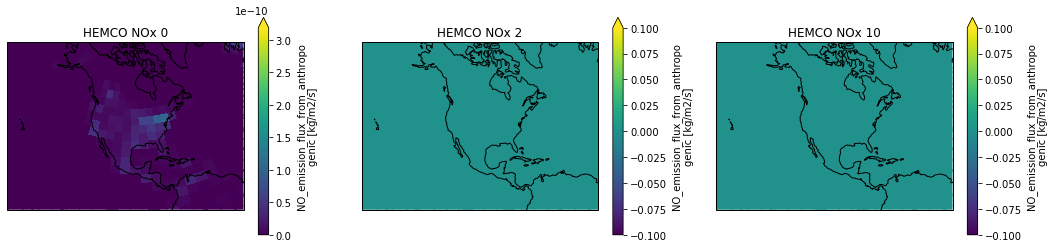

In [19]:
fig, axes = plt.subplots(1,3,figsize = [18,4], subplot_kw={'projection':ccrs.LambertConformal()})
for idx, level in enumerate([0,2,10]):
    ax = axes[idx]
    ds_HEMCO['EmisNO_Anthro'].isel(lev = level).plot(ax = ax,
                                                     extend='max',#extend the colorbar in both directions
                                                   transform=ccrs.PlateCarree(), #fit data into map
                                                    cmap='viridis')
    ax.coastlines()
    ax.set_extent([-150, -50, 0, 70])
    ax.set_title(f'HEMCO NOx {level}')